In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.cross_validation import train_test_split

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.linear_model import LogisticRegression, SGDClassifier


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [5]:
train = pd.read_csv('./../Основы/train_mnist.csv')

In [6]:
!head train_mnist.csv

head: train_mnist.csv: No such file or directory


In [7]:
Y  = train['label'].values

In [8]:
train.shape

(42000, 785)

In [9]:
train.drop(['label'], axis=1, inplace=True)

In [10]:
X = train.values

In [11]:
X.shape   # 42 000 объектов по 748 признаков у каждого

(42000, 784)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
Y

array([1, 0, 1, ..., 7, 6, 9])

In [36]:
lg_clf = LogisticRegression(
#     multi_class='multinomial', solver='saga'
    C=0.01, n_jobs=-1, 
    verbose=1, max_iter=50
)
lg_clf.fit(X_train, Y_train)
Y_pred = lg_clf.predict(X_test)

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/svm/base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
lg_clf.predict_proba([X_test[0]])

array([[9.24780630e-01, 9.28523393e-24, 1.00661081e-02, 1.40153777e-03,
        8.43752551e-06, 5.72317690e-02, 6.03375443e-04, 2.21352791e-13,
        5.78354989e-03, 1.24591847e-04]])

In [38]:
print(classification_report(y_true=Y_test,y_pred=Y_pred,digits=5))
print(accuracy_score(y_true=Y_test,y_pred=Y_pred))

             precision    recall  f1-score   support

          0    0.96300   0.97614   0.96953       880
          1    0.94317   0.97075   0.95676       889
          2    0.90841   0.87334   0.89053       829
          3    0.87673   0.90059   0.88850       845
          4    0.90773   0.91228   0.91000       798
          5    0.89373   0.86089   0.87701       762
          6    0.94444   0.96265   0.95346       830
          7    0.92188   0.91778   0.91982       900
          8    0.85185   0.87121   0.86142       792
          9    0.89762   0.86171   0.87930       875

avg / total    0.91177   0.91190   0.91168      8400

0.9119047619047619


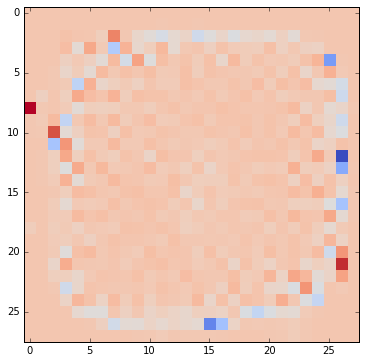

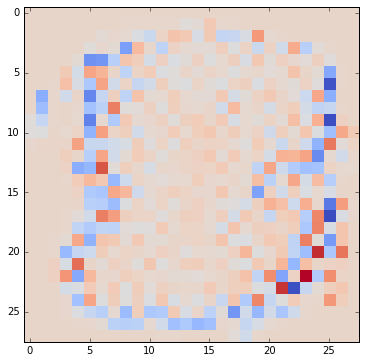

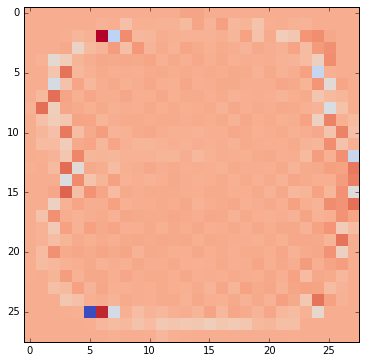

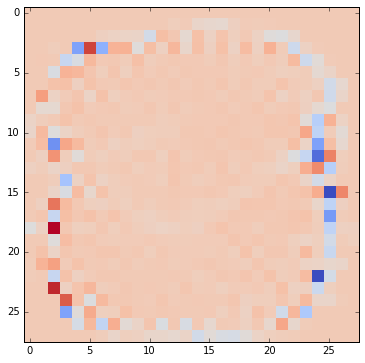

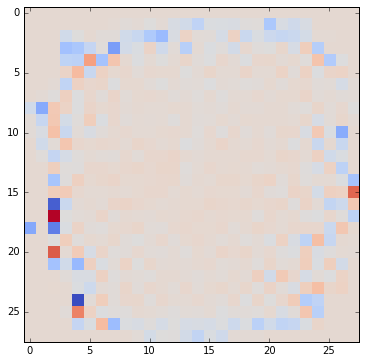

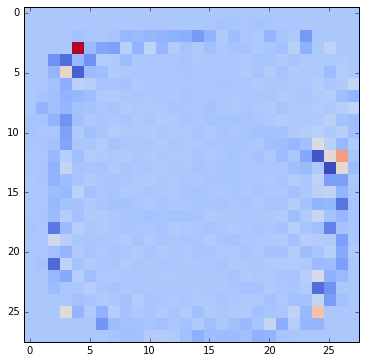

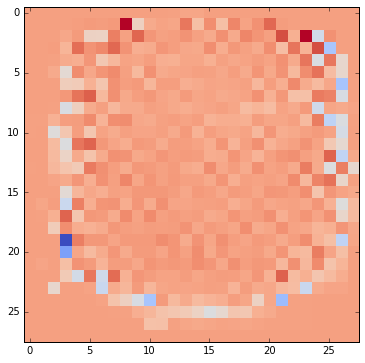

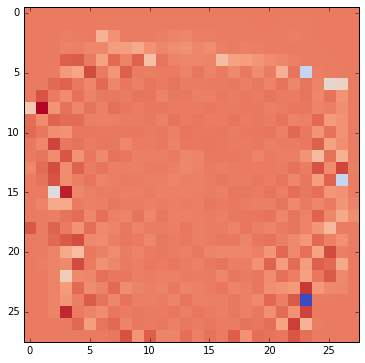

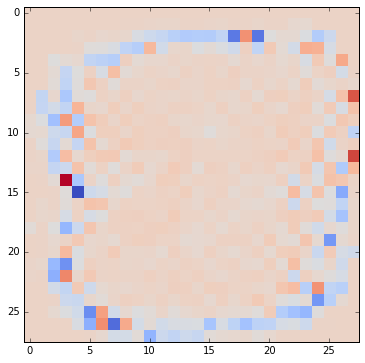

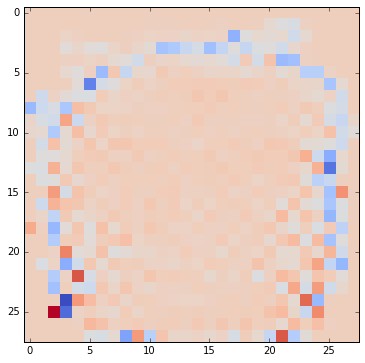

In [40]:
for i in range(10):
    plt.figure(figsize=(6, 6))
    plt.imshow(lg_clf.coef_[i].reshape(28, 28), interpolation='nearest', cmap='coolwarm')
    plt.show()

In [13]:
lg_clf = LogisticRegression(
    multi_class='multinomial', solver='saga',
    C=0.01, n_jobs=-1, 
    verbose=1, max_iter=50
)
lg_clf.fit(X_train, Y_train)
Y_pred = lg_clf.predict(X_test)

max_iter reached after 71 seconds


/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.2min finished


In [14]:
print(classification_report(y_true=Y_test,y_pred=Y_pred,digits=5))
print(accuracy_score(y_true=Y_test,y_pred=Y_pred))

             precision    recall  f1-score   support

          0    0.96581   0.97055   0.96818       815
          1    0.95400   0.96670   0.96031       901
          2    0.90528   0.90854   0.90691       831
          3    0.90659   0.88331   0.89480       857
          4    0.92723   0.92260   0.92491       801
          5    0.89569   0.84404   0.86910       763
          6    0.94881   0.95335   0.95107       836
          7    0.92375   0.92779   0.92576       914
          8    0.86993   0.88150   0.87568       827
          9    0.86697   0.89942   0.88289       855

avg / total    0.91669   0.91667   0.91655      8400

0.9166666666666666


0


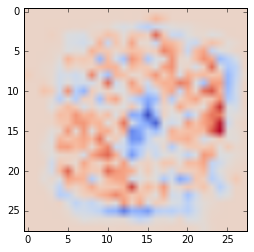

1


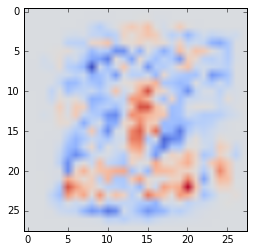

2


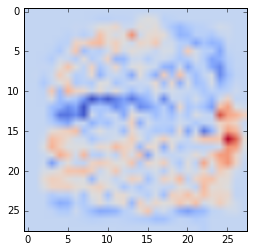

3


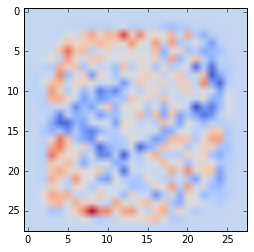

4


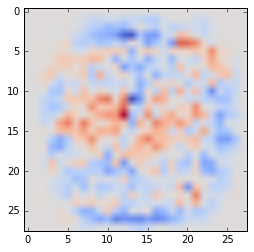

5


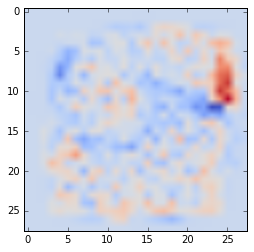

6


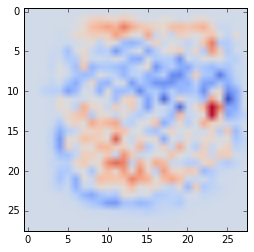

7


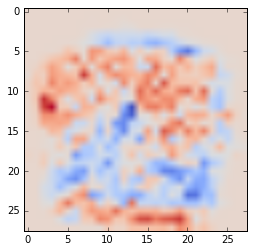

8


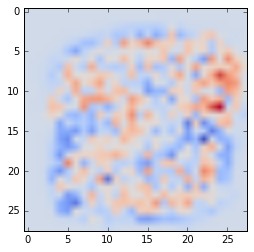

9


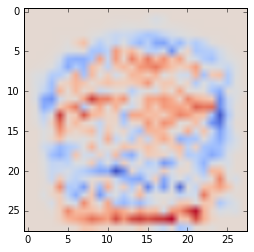

In [15]:
for i in range(10):
    print(i)
    plt.figure(figsize=(4, 4))
    plt.imshow(lg_clf.coef_[i].reshape(28, 28), 
#                interpolation='nearest',
               cmap='coolwarm')
    plt.show()

In [17]:
lg_clf = LogisticRegression(penalty='l1',
    multi_class='multinomial', solver='saga',
    C=0.001, n_jobs=-1, 
    verbose=1, max_iter=200
)
lg_clf.fit(X_train, Y_train)
Y_pred = lg_clf.predict(X_test)

max_iter reached after 451 seconds


/Users/talipov/MyProjects/projectX/acosta_env/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


max_iter reached after 453 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  7.5min finished


In [18]:
print(classification_report(y_true=Y_test,y_pred=Y_pred,digits=5))
print(accuracy_score(y_true=Y_test,y_pred=Y_pred))

             precision    recall  f1-score   support

          0    0.96224   0.96933   0.96577       815
          1    0.95082   0.96559   0.95815       901
          2    0.90557   0.90012   0.90284       831
          3    0.90528   0.88098   0.89296       857
          4    0.92135   0.92135   0.92135       801
          5    0.88677   0.85190   0.86898       763
          6    0.93824   0.94498   0.94160       836
          7    0.92629   0.92123   0.92375       914
          8    0.86587   0.87424   0.87004       827
          9    0.86765   0.89708   0.88212       855

avg / total    0.91343   0.91345   0.91335      8400

0.9134523809523809


0


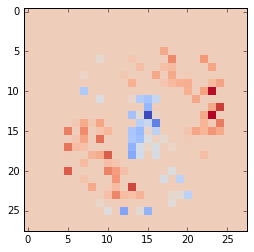

1


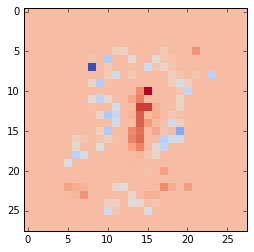

2


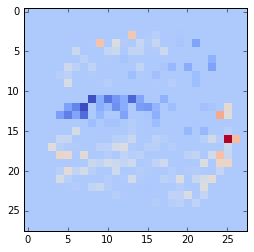

3


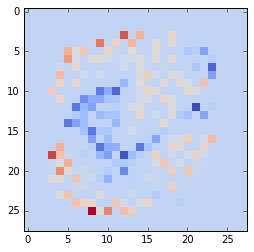

4


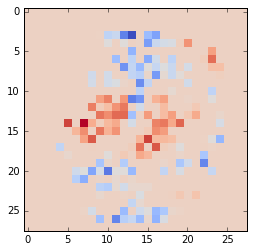

5


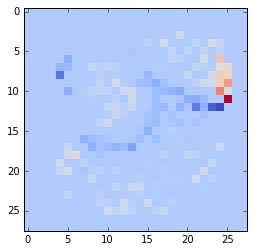

6


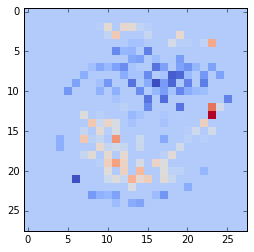

7


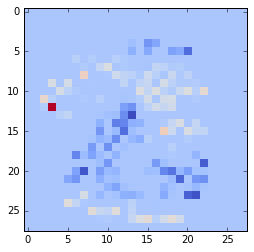

8


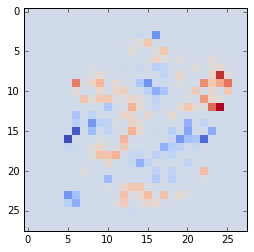

9


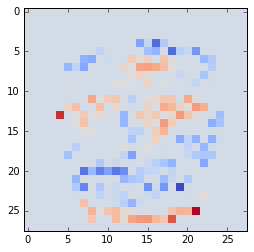

In [19]:
for i in range(10):
    print(i)
    plt.figure(figsize=(4, 4))
    plt.imshow(lg_clf.coef_[i].reshape(28, 28), 
               interpolation='nearest',
               cmap='coolwarm')
    plt.show()

In [20]:
clf = RandomForestClassifier(
    n_estimators=2000,
    max_depth=9,
    max_features='sqrt',
    verbose=1, 
    n_jobs=-1
)

In [21]:
clf.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [22]:
Y_pred = clf.predict(X_test)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.3s finished


In [23]:
print(classification_report(y_true=Y_test,y_pred=Y_pred,digits=5))
print(accuracy_score(y_true=Y_test,y_pred=Y_pred))

             precision    recall  f1-score   support

          0    0.96743   0.98405   0.97567       815
          1    0.95341   0.97669   0.96491       901
          2    0.93742   0.93742   0.93742       831
          3    0.92917   0.90315   0.91598       857
          4    0.94238   0.91885   0.93047       801
          5    0.96027   0.91874   0.93905       763
          6    0.95076   0.97010   0.96033       836
          7    0.93653   0.92013   0.92826       914
          8    0.92822   0.92261   0.92541       827
          9    0.86556   0.91111   0.88775       855

avg / total    0.93677   0.93643   0.93642      8400

0.9364285714285714


In [24]:
confusion_matrix(y_true=Y_test,y_pred=Y_pred)

array([[802,   0,   0,   1,   1,   0,   6,   0,   4,   1],
       [  0, 880,   5,   6,   1,   0,   3,   1,   2,   3],
       [  5,   1, 779,   4,   5,   0,   8,  19,   8,   2],
       [  0,   7,  21, 774,   3,  16,   2,  13,   9,  12],
       [  2,   1,   2,   0, 736,   0,   9,   2,   6,  43],
       [  8,   5,   1,  16,   2, 701,  10,   2,   9,   9],
       [  6,   2,   0,   0,   3,   9, 811,   0,   5,   0],
       [  0,   7,  16,   1,   7,   0,   0, 841,   5,  37],
       [  1,  15,   5,  18,   1,   4,   3,   3, 763,  14],
       [  5,   5,   2,  13,  22,   0,   1,  17,  11, 779]])

In [25]:
feature_importance = clf.feature_importances_

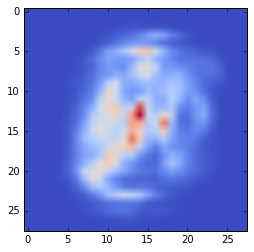

In [26]:
plt.figure()
plt.imshow(feature_importance.reshape(28,28), cmap='coolwarm')
plt.show()

In [27]:
pca=PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train[:,feature_importance!=0])
X_test_pca = pca.transform(X_test[:,feature_importance!=0])

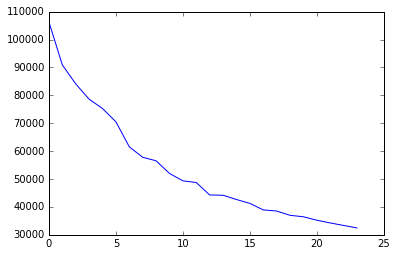

In [28]:
plt.figure()
plt.plot(pca.singular_values_)
plt.show()

In [29]:
# _X_train = np.hstack([
#     X_train[:,feature_importance!=0],
#     X_train_pca
# ])
# _X_test = np.hstack([
#     X_test[:,feature_importance!=0],
#     X_test_pca
# ])

In [68]:
clf2 = RandomForestClassifier(n_estimators=2000, max_depth=9, max_features='sqrt', verbose=1, n_jobs=-1)
clf2.fit(_X_train, Y_train)
_Y_predict = clf2.predict(_X_test)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.4min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.6s finished


In [69]:
print(classification_report(y_true=Y_test,y_pred=_Y_predict, digits=5))
print(accuracy_score(y_true=Y_test,y_pred=Y_pred))

             precision    recall  f1-score   support

          0    0.98007   0.97664   0.97835       856
          1    0.96162   0.98303   0.97221       943
          2    0.93390   0.93966   0.93677       812
          3    0.92391   0.89789   0.91071       852
          4    0.95026   0.91862   0.93417       811
          5    0.93398   0.91633   0.92507       741
          6    0.95059   0.97467   0.96248       829
          7    0.96222   0.92509   0.94329       881
          8    0.91481   0.90587   0.91032       818
          9    0.85870   0.92182   0.88914       857

avg / total    0.93738   0.93679   0.93684      8400



In [74]:
X_train_nonzero = np.count_nonzero(X_train, axis=1)
X_test_nonzero = np.count_nonzero(X_test, axis=1)

In [79]:
from scipy.ndimage.filters import gaussian_filter

In [77]:
X_train.reshape(-1, 28,28).shape

(33600, 28, 28)

In [84]:
img = X_train[0].reshape( 28,28)

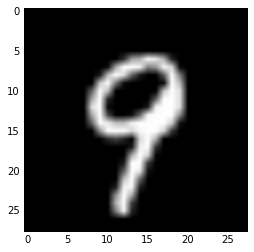

In [85]:
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

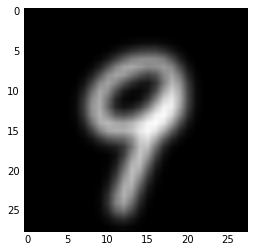

In [98]:
plt.figure()
plt.imshow(gaussian_filter(img, 1), cmap='gray')
plt.show()

In [99]:
X_train_blur = gaussian_filter(X_train.reshape(-1, 28,28), 2)
X_test_blur = gaussian_filter(X_test.reshape(-1, 28,28), 2)

In [100]:
X_train_blur = X_train_blur.reshape(-1, 28*28)
X_test_blur = X_test_blur.reshape(-1, 28*28)

In [101]:
clf2 = RandomForestClassifier(n_estimators=2000, max_depth=9, max_features='sqrt', verbose=1, n_jobs=-1)
clf2.fit(X_train_blur, Y_train)
_Y_predict = clf2.predict(X_test_blur )

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.9min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    1.5s finished


In [102]:
print(classification_report(y_true=Y_test,y_pred=_Y_predict, digits=5))

             precision    recall  f1-score   support

          0    0.37621   0.54322   0.44455       856
          1    0.34604   0.48144   0.40266       943
          2    0.37313   0.40025   0.38622       812
          3    0.37756   0.32394   0.34870       852
          4    0.34737   0.32552   0.33609       811
          5    0.32486   0.15520   0.21005       741
          6    0.37887   0.42823   0.40204       829
          7    0.37216   0.40976   0.39006       881
          8    0.32037   0.21149   0.25479       818
          9    0.29028   0.23337   0.25873       857

avg / total    0.35098   0.35571   0.34598      8400



In [110]:
confusion_matrix(y_true=Y_test,y_pred=_Y_predict)

array([[465,  56,  40,  48,  27,  36,  49,  59,  39,  37],
       [ 63, 454,  92,  48,  38,  37,  59,  75,  33,  44],
       [ 80, 101, 325,  59,  42,   8,  84,  52,  41,  20],
       [108, 100,  78, 276,  32,  28,  54,  81,  45,  50],
       [ 66,  97,  38,  27, 264,  24,  73,  70,  46, 106],
       [113,  96,  41,  80,  60, 115,  79,  72,  41,  44],
       [ 97,  72,  73,  38,  63,  27, 355,  39,  32,  33],
       [ 81, 106,  56,  51,  54,  18,  29, 361,  41,  84],
       [ 81, 132,  68,  60,  58,  37,  84,  54, 173,  71],
       [ 82,  98,  60,  44, 122,  24,  71, 107,  49, 200]])

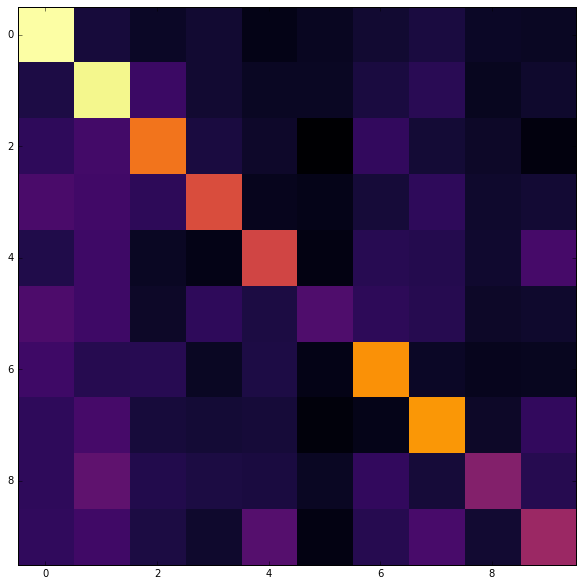

In [109]:
plt.figure(figsize=(10,10))
plt.imshow(confusion_matrix(y_true=Y_test,y_pred=_Y_predict), cmap='inferno', interpolation='nearest')
plt.show()

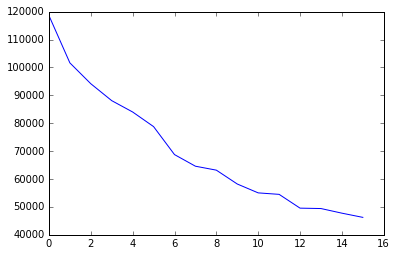

In [28]:
pca.components_.shape

(16, 784)

In [30]:
pca.components_[0].shape

(784,)

In [32]:
pca.components_[0].reshape(28,28).shape

(28, 28)

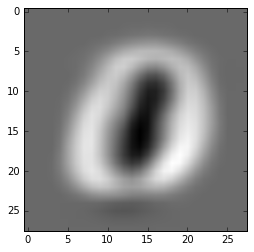

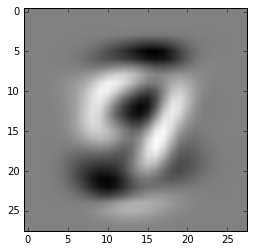

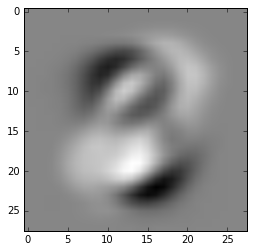

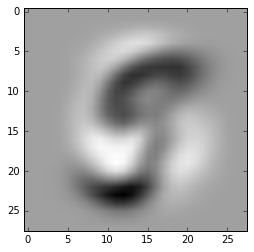

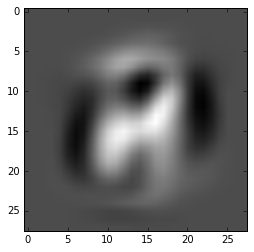

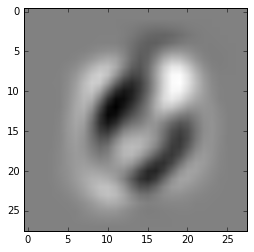

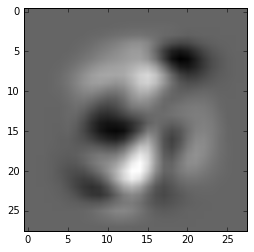

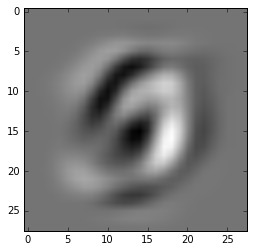

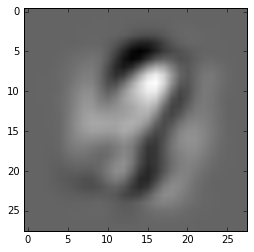

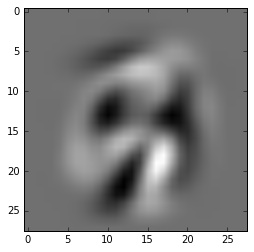

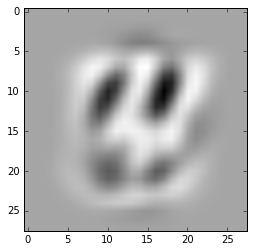

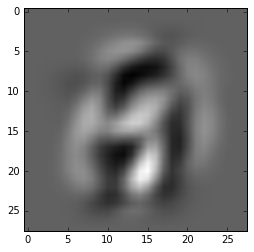

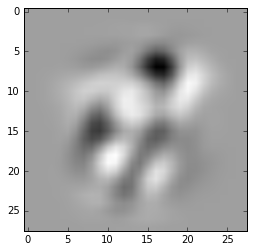

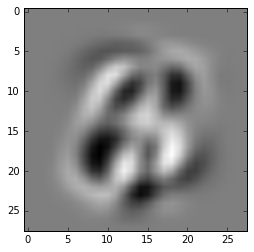

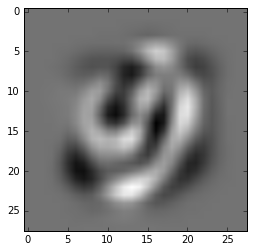

In [26]:
for i in range(15):
    plt.figure()
    plt.imshow(pca.components_[i].reshape(28,28), cmap='gray')
    plt.show()